It's an unusual way to check the best neighborhood by checking the amount of smart trash. However, by using such details, it could refelect that where has more population, where has more municipal services.

Missing 'neighborhood': 1

Trash can counts by Neighborhood:
           neighborhood  TrashCount
57            Shadyside          76
25         East Liberty          68
66  Squirrel Hill South          63
8            Bloomfield          58
48          North Shore          53
..                  ...         ...
46           Mt. Oliver           1
50              Oakwood           1
49    Northview Heights           1
60          South Shore           1
78              Windgap           1

[79 rows x 2 columns] 



/scratch/slurm-11611/ipykernel_176418/1596285803.py:58: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  top15_polygons['center'] = top15_polygons.geometry.centroid


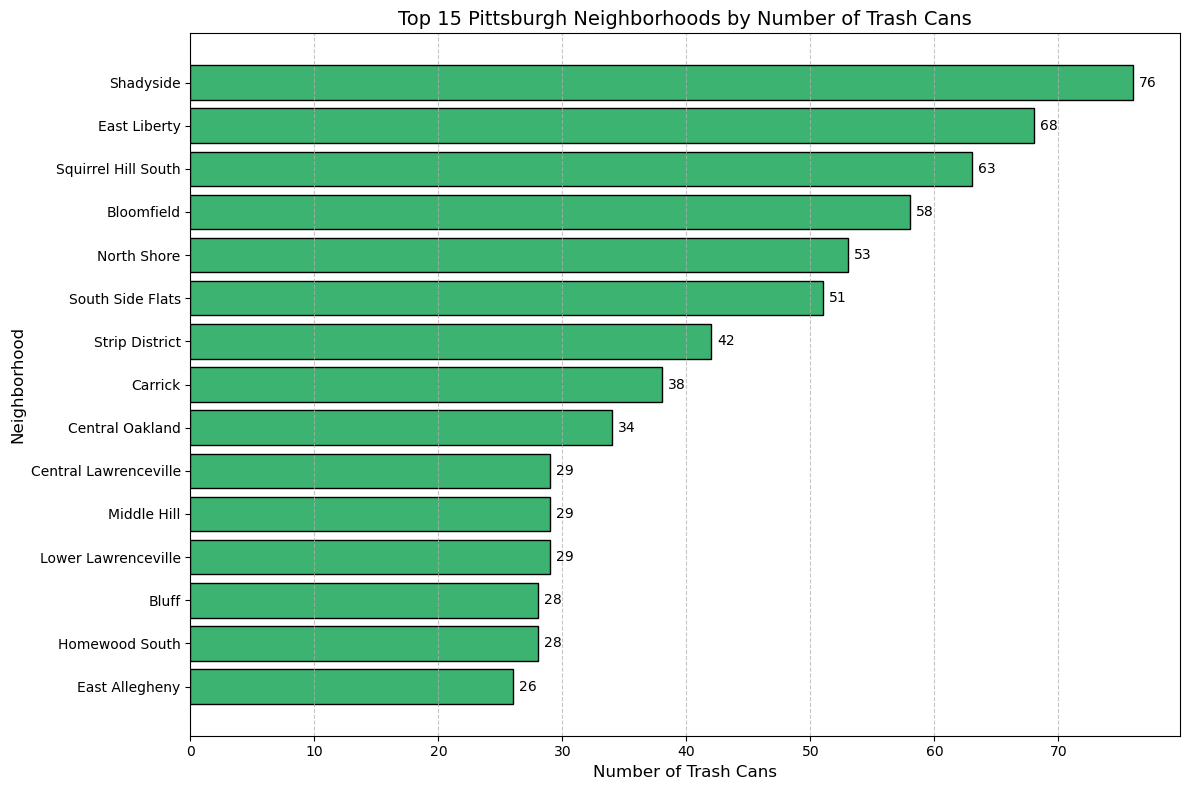

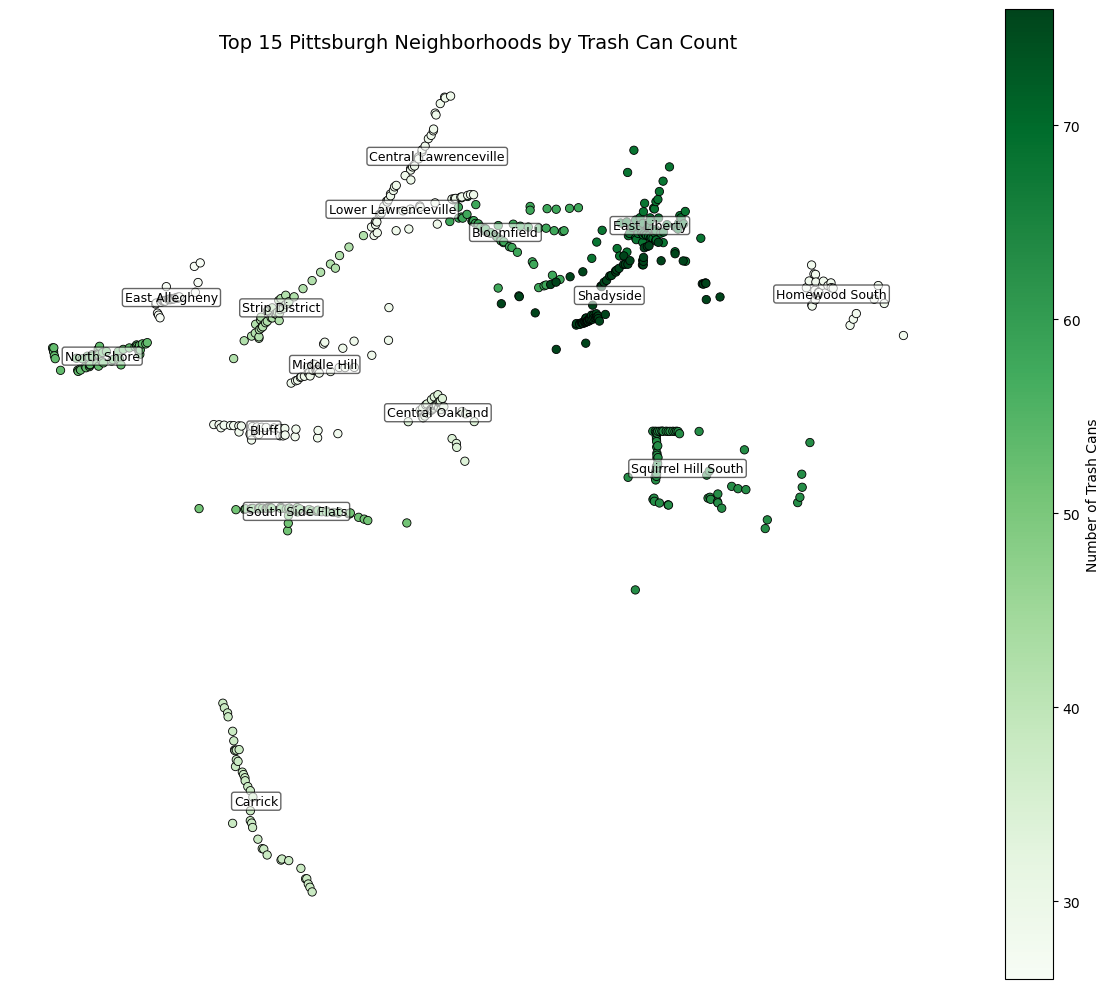

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# read csv
trash_df = pd.read_csv('number_of_transhes.csv')

# count csv
missing = trash_df['neighborhood'].isna().sum()
print(f"Missing 'neighborhood': {missing}")

# categorized by community
trash_by_nhd = trash_df.groupby('neighborhood').size().reset_index(name='TrashCount')
print("\nTrash can counts by Neighborhood:")
print(trash_by_nhd.sort_values(by='TrashCount', ascending=False), "\n")

# most 15 community
most_bins = trash_by_nhd.sort_values(by='TrashCount', ascending=False).head(15)

# draw
plt.figure(figsize=(12, 8))
bars = plt.barh(most_bins['neighborhood'], most_bins['TrashCount'],
                color='mediumseagreen', edgecolor='black')

plt.xlabel('Number of Trash Cans', fontsize=12)
plt.ylabel('Neighborhood', fontsize=12)
plt.title('Top 15 Pittsburgh Neighborhoods by Number of Trash Cans', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()  # 最多的社区放在顶部

# graph border settings
for bar in bars:
    width = bar.get_width()
    y_pos = bar.get_y() + bar.get_height() / 2
    plt.text(width + 0.5, y_pos, str(int(width)), va='center', fontsize=10)

plt.tight_layout()
plt.show


#show the top 15 on the graph
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# get geojson file(show on map with community)
gdf = gpd.read_file("trashes.geojson")


# get top15's dot and collect as area
gdf_top15 = gdf[gdf['neighborhood'].isin(top15['neighborhood'])]

# combine them to area(like border)
top15_polygons = gdf_top15.dissolve(by='neighborhood', as_index=False)
top15_polygons = top15_polygons.merge(top15, on='neighborhood', how='left')

# calculate where to show the community name
top15_polygons_proj = top15_polygons.to_crs(epsg=3857)
top15_polygons['center'] = top15_polygons.geometry.centroid

# draw
fig, ax = plt.subplots(figsize=(12, 10))

# file in color
top15_polygons.plot(
    column='TrashCount',
    cmap='Greens',
    legend=True,
    legend_kwds={'label': "Number of Trash Cans"},
    edgecolor='black',
    linewidth=0.6,
    ax=ax
)

# mark community name
for idx, row in top15_polygons.iterrows():
    x, y = row['center'].x, row['center'].y
    plt.text(x, y, row['neighborhood'], fontsize=9, ha='center', va='center', color='black', bbox=dict(boxstyle="round,pad=0.2", fc="white", alpha=0.6))

# graph border settings
plt.title("Top 15 Pittsburgh Neighborhoods by Trash Can Count", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()


The result is obvious: Shadyside and East liberty obviously has the most amount of smart garbages. The result is not shocking for me. Since as you can see from the second graph, they are almost connecting each other. But, if you like quiet. Squirrel Hill South is also a great place for you to consider. As you can see, most of the garbage are on one street. while others places in that location doesn't have too much garbage.